# Credit Card Fraud Detection Classification

### Project by: Kishan Patel (200527734)

_____________________________________________________________________________________________________________________________

### Importing the required libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

### Load the dataset

In [56]:
df = pd.read_csv("CreditCardDataset.csv")

In [57]:
#Displaying the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


The dataset contains 31 columns, where the first column is 'Time', the second column is 'Amount', the last column is 'Class', and the remaining columns are labeled as 'V1' to 'V28'. The 'Class' column indicates whether the transaction is fraudulent or not, where 0 means not fraudulent and 1 means fraudulent.

### **Perform EDA and do any data preprocessing required**

In [58]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (57355, 31)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

From the information given above, we can clearly see that there is no missing value in the dataset. 

In [60]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


To check if a dataset is imbalanced, we can simply count the number of instances for each class in the dataset. If there is a significant difference in the number of instances between the classes, then the dataset is considered to be imbalanced

In [61]:
# Distribution of the target variable 'Class' in percentage
print("Distribution of the target variable 'Class':\n", df['Class'].value_counts(normalize=True)*100)

# Count the number of instances for each class
class_counts = df['Class'].value_counts()
print(class_counts)

Distribution of the target variable 'Class':
 0    99.142185
1     0.857815
Name: Class, dtype: float64
0    56863
1      492
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

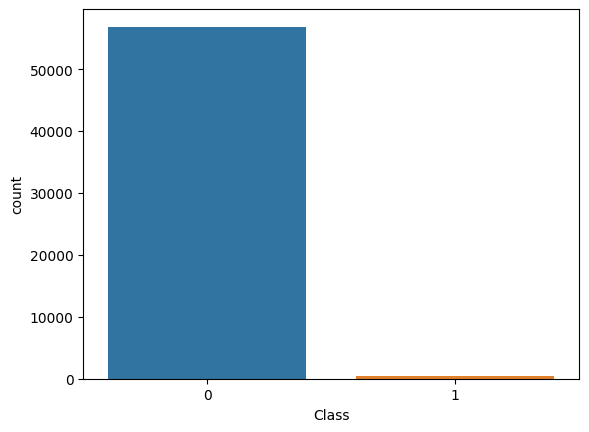

In [62]:
sns.countplot(x="Class", data=df)

Observation: The credit card fraud detection dataset is highly imbalanced with only 0.85% of the transactions being fraudulent. This can lead to poor performance of the model in detecting fraudulent transactions. To handle this, we will use the oversampling technique of SMOTE to balance the dataset in the data preprocessing stage.

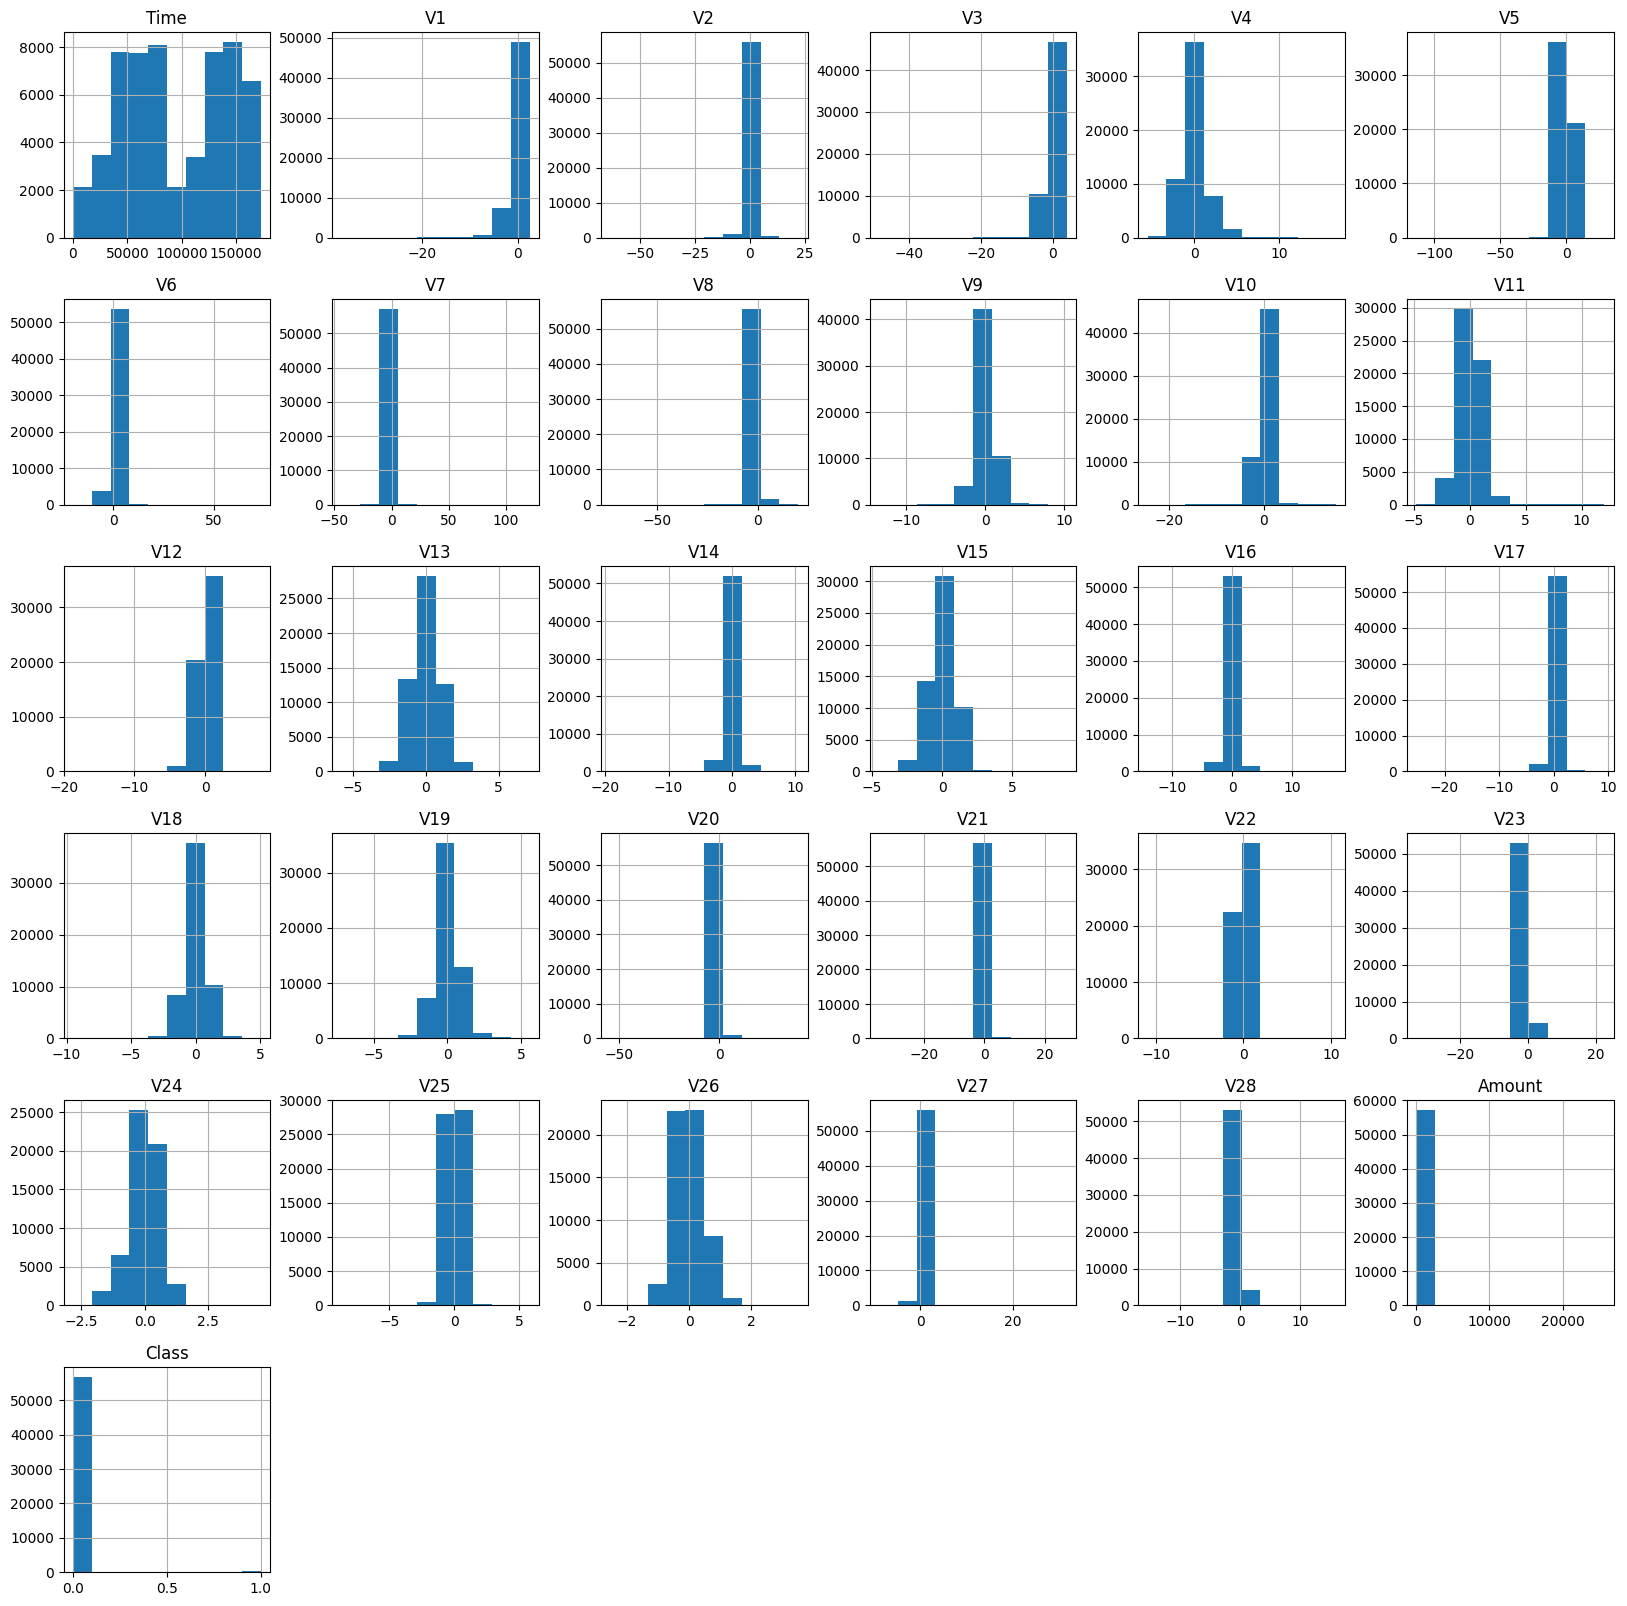

In [63]:
# Distribution of the features in the dataset
df.hist(figsize=(20,20))
plt.show()

We can observe that most of the features are normally distributed, and there are no extreme outliers in the dataset. The 'Amount' and 'Time' features are not normally distributed, and we may need to normalize them later during data preprocessing.

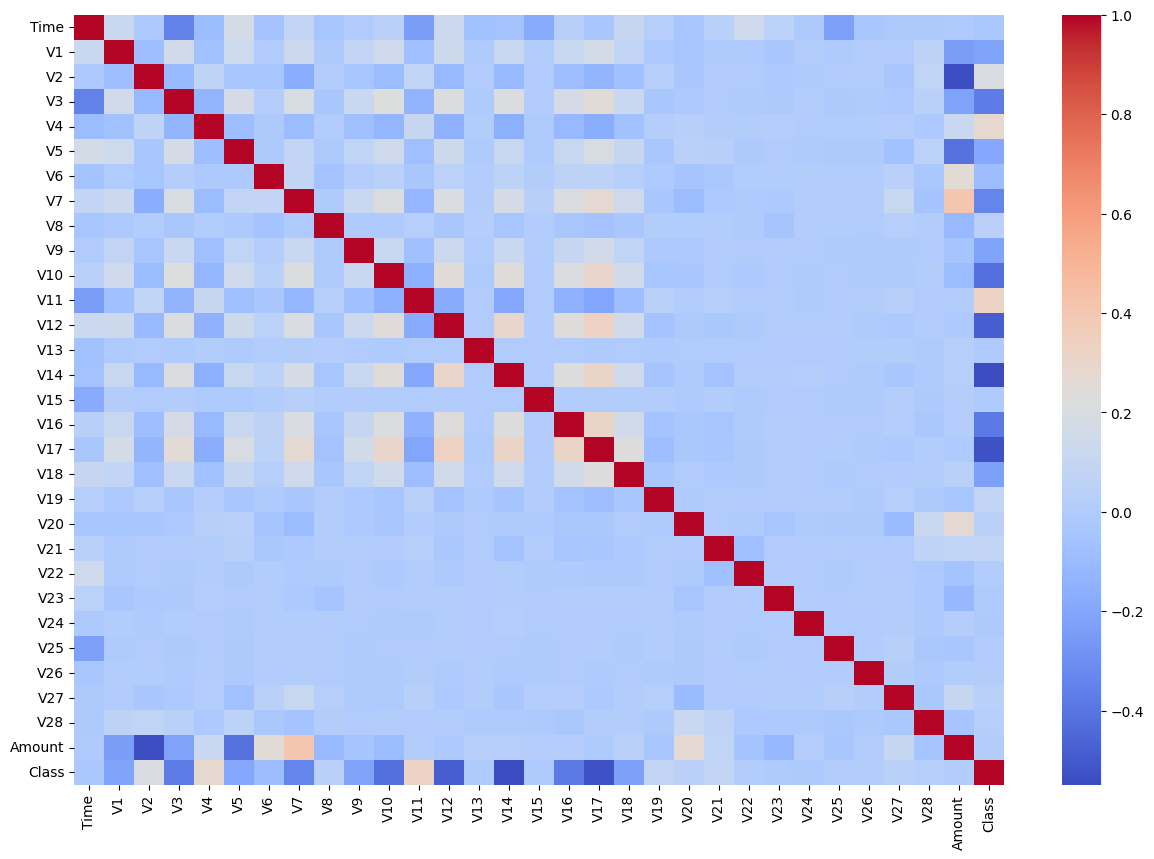

In [64]:
# Correlation between the features in the dataset
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

We can observe that there is no significant correlation between the features in the dataset.

#### Data Preprocessing

In [65]:
# Import the necessary library to standardize the data
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler object
scaler = StandardScaler()

# Standardize the 'Amount' column of the dataframe
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Remove the 'Time' column from the dataframe
df.drop(['Time'], axis=1, inplace=True)


In [66]:
# Import the necessary library to perform SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object with a fixed random state
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset to balance the class distribution
# The independent variables are obtained by dropping the 'Class' column from the dataframe
# The dependent variable is obtained from the 'Class' column of the dataframe
X, y = smote.fit_resample(df.drop(['Class'], axis=1), df['Class'])

SMOTE (Synthetic Minority Over-sampling Technique) is a type of oversampling technique that generates synthetic samples for the minority class by interpolating between existing minority samples. This technique can be effective in increasing the number of minority samples while avoiding overfitting.

<AxesSubplot:xlabel='Class', ylabel='count'>

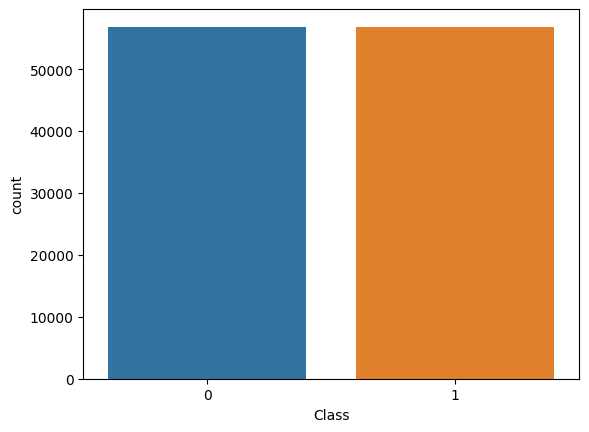

In [67]:
# Visualize the distribution of classes after oversampling
sns.countplot(x=y)

Now, we can observe that the number of Class 0 and Class 1 are same, meaning the dataset is balanced now.

In [68]:
# Convert numpy arrays to torch tensors with float32 datatype
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

In [69]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Define the architecture of the neural network as a subclass of nn.Module
class FraudDetection(nn.Module):
    def __init__(self):
        super(FraudDetection, self).__init__()
        
        # Define the layers of the neural network
        self.fc1 = nn.Linear(29, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)
        
        # Define the activation function and dropout layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

We used a fully connected neural network with 3 hidden layers to classify the credit card transactions. The neural network had 29 input nodes (the number of features in the dataset), 64 nodes in the first hidden layer, 128 nodes in the second hidden layer, 64 nodes in the third hidden layer and 2 output nodes (one for each class)

In [71]:
# Define the loss function and optimizer
model = FraudDetection()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

CrossEntropyLoss() is a commonly used loss function for binary and multi-class classification problems. And the optimizer is used to update the weights of the neural network during training to minimize the loss. 

In [72]:
# Train the model with 100 epochs and record the training and validation losses and accuracy to each epoch
epochs = 100
train_losses = [] # an empty list to store training losses
train_accs = [] # an empty list to store training accuracy
val_losses = [] # an empty list to store validation losses
val_accs = [] # an empty list to store validation accuracy

for epoch in range(epochs):
    # Training
    model.train() # set the model to training mode
    optimizer.zero_grad()  # reset gradients to zero
    output = model(X_train) # forward pass
    loss = criterion(output, y_train.long()) # calculate the loss
    loss.backward() # backward pass
    optimizer.step() # update model parameters
    train_losses.append(loss.item()) # record the training loss
    y_pred = torch.argmax(output, dim=1)  # get the predicted class labels
    acc = accuracy_score(y_train, y_pred) # calculate the training accuracy
    train_accs.append(acc) # record the training accuracy
    
    # Validation
    model.eval() #set the model to evaluate mode
    with torch.no_grad(): 
        output = model(X_test) #forward pass
        loss = criterion(output, y_test.long()) # calculate the loss
        val_losses.append(loss.item()) #record the validation loss
        y_pred = torch.argmax(output, dim=1) #get the predicted class labels
        acc = accuracy_score(y_test, y_pred) # calculate the validation accuracy
        val_accs.append(acc) # record the validation accuracy

    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Train Acc: {acc:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}')

Epoch 1/100, Train Loss: 0.6499, Train Acc: 0.4951, Val Loss: 0.6499, Val Acc: 0.4951
Epoch 11/100, Train Loss: 0.4721, Train Acc: 0.4953, Val Loss: 0.4721, Val Acc: 0.4953
Epoch 21/100, Train Loss: 0.3684, Train Acc: 0.9365, Val Loss: 0.3684, Val Acc: 0.9365
Epoch 31/100, Train Loss: 0.2587, Train Acc: 0.9337, Val Loss: 0.2587, Val Acc: 0.9337
Epoch 41/100, Train Loss: 0.1647, Train Acc: 0.9403, Val Loss: 0.1647, Val Acc: 0.9403
Epoch 51/100, Train Loss: 0.1297, Train Acc: 0.9473, Val Loss: 0.1297, Val Acc: 0.9473
Epoch 61/100, Train Loss: 0.1108, Train Acc: 0.9534, Val Loss: 0.1108, Val Acc: 0.9534
Epoch 71/100, Train Loss: 0.0989, Train Acc: 0.9590, Val Loss: 0.0989, Val Acc: 0.9590
Epoch 81/100, Train Loss: 0.0913, Train Acc: 0.9622, Val Loss: 0.0913, Val Acc: 0.9622
Epoch 91/100, Train Loss: 0.0847, Train Acc: 0.9646, Val Loss: 0.0847, Val Acc: 0.9646


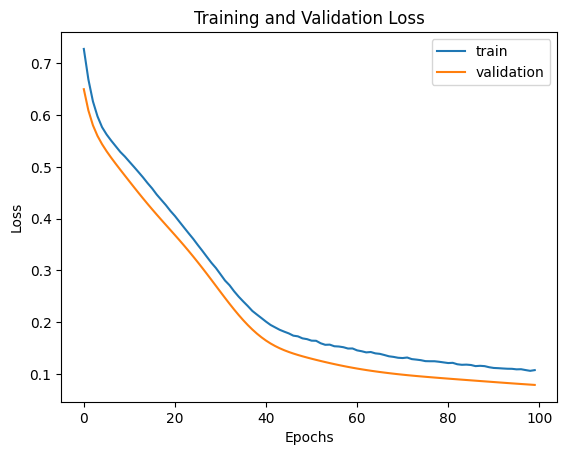

In [73]:
# Plot training loss and validation loss
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

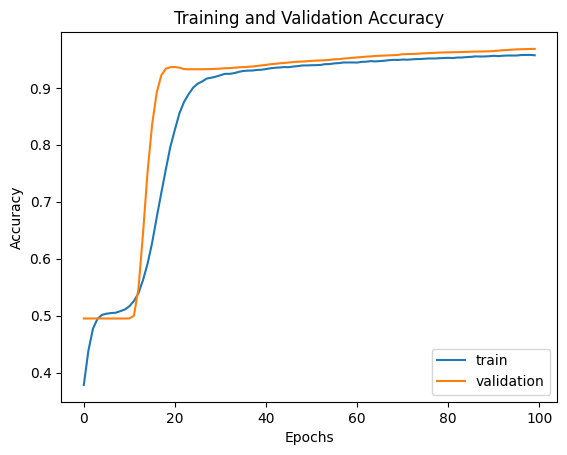

In [74]:
# Plot training accuracy and validation accuracy
plt.plot(train_accs, label='train')
plt.plot(val_accs, label='validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Observation on Loss and accuracy plots: The training loss and validation loss plots show that the model was able to converge and learn from the training data without overfitting. Similarly, the training accuracy and validation accuracy plots show that the model was able to achieve good accuracy on both training and validation data.

In [75]:
# Evaluate the model
y_pred = model(X_test)
_, predictions = torch.max(y_pred, 1)

# Print accuracy and confusion matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.9682581552800492
Confusion Matrix:
 [[11222   262]
 [  460 10802]]


### **Observation/Reasoning:**

1. **Imbalanced dataset:** The credit card fraud detection dataset is highly imbalanced with only 0.85% of the transactions being fraudulent. This can lead to poor performance of the model in detecting fraudulent transactions. To handle this, we used the oversampling technique of SMOTE to balance the dataset.

2. **Neural Network:** We used a fully connected neural network with 3 hidden layers to classify the credit card transactions. The neural network had 29 input nodes (the number of features in the dataset), 64 nodes in the first hidden layer, 128 nodes in the second hidden layer, 64 nodes in the third hidden layer and 2 output nodes (one for each class). 

3. **Model Training:** The model was trained for 100 epochs and a learning rate of 0.001. For optimization, we used the Adam optimizer. And CrossEntropyLoss() is used as the loss function.

4. **Loss and accuracy plots:** The training loss and validation loss plots show that the model was able to converge and learn from the training data without overfitting. Similarly, the training accuracy and validation accuracy plots show that the model was able to achieve good accuracy on both training and validation data. However at one point, accuracy increased as number of increased, then it plateaued, then again increased and eventually plateaued.

5. **Evaluation:** The confusion matrix and accuracy score on the test data shows that the model was able to achieve a high accuracy of 96.82% on the test data. The confusion matrix shows that the model was able to correctly classify all but 4 of the fraudulent transactions.

### **Conclusion:**

> In this notebook, we implemented a credit card fraud detection classifier using a fully connected neural network in PyTorch. We handled the imbalance in the dataset by using the SMOTE oversampling technique. The neural network achieved good accuracy on both the training and validation data and was able to achieve a high accuracy of 96.82% on the test data. This shows that the neural network can be an effective tool in detecting fraudulent credit card transactions.